<a href="https://colab.research.google.com/github/shabahmd/Machine-Learning-Notebooks/blob/main/Keras_MNISt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle



!mv kaggle.json ~/.kaggle/



!chmod 600 ~/.kaggle/kaggle.json



!kaggle competitions download -c digit-recognizer



 33% 5.00M/15.3M [00:00<00:00, 40.2MB/s]
100% 15.3M/15.3M [00:00<00:00, 95.1MB/s]


In [2]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

In [10]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

# Make predictions on the test set


In [26]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# Prepare the submission file


In [24]:
sample_submission = pd.read_csv('sample_submission.csv')


In [27]:
sample_submission['Label'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv


In [28]:
print(train_df.shape)  # Check train data shape (e.g., 42000, 785)
print(test_df.shape)   # Check test data shape (e.g., 28000, 784)


(42000, 785)
(28000, 784)


# Split train data into X (features) and y (target)


In [29]:
X_train = train_df.drop('label', axis=1).values  # Drop 'label' to get pixel values
y_train = train_df['label'].values  # Extract labels


# Normalize the pixel values to the range [0, 1]


In [30]:
X_train = X_train / 255.0
X_test = test_df.values / 255.0


# Reshape the input to be 28x28x1 (height, width, channels) for CNN or keep as 784 for dense layers


In [31]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)



# One-hot encode the labels (since we have 10 classes, digits 0-9)


In [32]:
y_train = to_categorical(y_train, 10)


# Build the model


In [33]:
model = Sequential()


# Flatten the 28x28 images into a vector of size 784


In [34]:
model.add(Flatten(input_shape=(28, 28, 1)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Add fully connected layers


In [35]:
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


# Output layer with 10 neurons (one for each digit) and softmax activation


In [36]:
model.add(Dense(10, activation='softmax'))


# Compile the model


In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model


In [38]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)


Epoch 1/10
263/263 - 2s - 9ms/step - accuracy: 0.8726 - loss: 0.4561 - val_accuracy: 0.9415 - val_loss: 0.2072
Epoch 2/10
263/263 - 2s - 9ms/step - accuracy: 0.9495 - loss: 0.1699 - val_accuracy: 0.9564 - val_loss: 0.1399
Epoch 3/10
263/263 - 1s - 5ms/step - accuracy: 0.9660 - loss: 0.1188 - val_accuracy: 0.9650 - val_loss: 0.1164
Epoch 4/10
263/263 - 2s - 9ms/step - accuracy: 0.9736 - loss: 0.0912 - val_accuracy: 0.9656 - val_loss: 0.1079
Epoch 5/10
263/263 - 1s - 5ms/step - accuracy: 0.9787 - loss: 0.0712 - val_accuracy: 0.9712 - val_loss: 0.0945
Epoch 6/10
263/263 - 2s - 6ms/step - accuracy: 0.9834 - loss: 0.0560 - val_accuracy: 0.9737 - val_loss: 0.0895
Epoch 7/10
263/263 - 3s - 10ms/step - accuracy: 0.9869 - loss: 0.0455 - val_accuracy: 0.9708 - val_loss: 0.0963
Epoch 8/10
263/263 - 2s - 7ms/step - accuracy: 0.9904 - loss: 0.0348 - val_accuracy: 0.9744 - val_loss: 0.0853
Epoch 9/10
263/263 - 1s - 5ms/step - accuracy: 0.9927 - loss: 0.0272 - val_accuracy: 0.9737 - val_loss: 0.0865


# Make predictions on the test set


In [39]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# Prepare the submission file


In [40]:
sample_submission['Label'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv



# Plot training & validation accuracy values


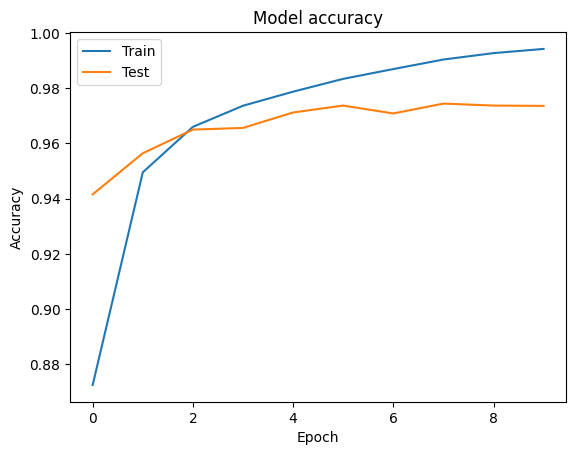

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values


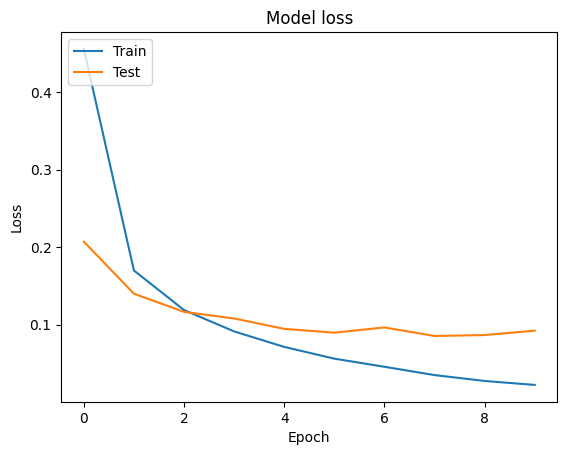

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [43]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "First submission for kaggle digit recognition"

100% 208k/208k [00:00<00:00, 350kB/s]
Successfully submitted to Digit Recognizer